# Bike Rental in Seoul

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

The dataset used in this assignment was collected to help predict the demand for bike rental in Seoul at any given day and time. It can be found in the University of California Irvine [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

The goal of this assignment is to preprocess the input variables into a format that makes them most useful for a linear regression model.

To begin with, let's import the necessary libraries and read in the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 120

data = pd.read_csv("../data/seoul_bike_data.csv") 

## Initial data inspection

Now that we have the dataset loaded in, let's inspect it with the methods `.info()` and `.head()`. 

Note that the variable `Rented Bike Count` is the target variable we are aiming to predict in this assignment.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8743 non-null   object 
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As we can see, there are a lot of different variables which take very different ranges, very different units, and, accordingly, have very different interpretations.

## Categorical vs. Continuous Variables

We must analyse each variable and decide how to preprocess it. Some variables are given in a discrete format, but it makes sense to make them continuous, and vice-versa. 

**Q1. Which variable columns are continuous quantities and which are categorical?**


Create two lists, `categorical` and `continuous` which contain the column indices for the categorical and continuous fields, respectively.

In [4]:
# Add your code below
categorical = [0, 4, 11, 12, 13 ]
continuous = [1, 2, 3, 5, 6, 7, 8, 9, 10 ]


**Q2. Transform the `Date` variable to a continuous value.**


The `Date` variable could be informative about a trend over time, and can be interpreted as a continuous variable for time. 

Using `.copy()`, create a copy of `data` called `data_date`. 

From `data_date`, create a new variable containing the values of the `Date` column, but converted to a datetime format (using `pd.to_datetime`). Be sure to specify `format="%d/%m/%Y"` otherwise `pandas` may incorrectly parse the dates.

Next, compute **the number of days** between each of these dates and the reference date `01/01/2017` and assign this to a new column in `data_date` called `DayCount`.


Leave the `Date` column unchanged.

*Hint: use the `pd.to_datetime()` function and subtract the values in the `Date` column from the reference date.*

In [5]:
# Add your code below
data_date = data.copy()

# Convert the 'Date' column to datetime format
date_converted = pd.to_datetime(data_date['Date'], format="%d/%m/%Y")

# Define reference date
reference_date = pd.to_datetime("01/01/2017", format="%d/%m/%Y")

# Compute number of days between each date and the reference date
data_date['DayCount'] = (date_converted - reference_date).dt.days



**Q3. Create a new DataFrame with the one-hot representation of the season**


Categorical variables must be formatted to a one-hot representation to be ready for a linear regression model. Create $4$ new columns with the one-hot representation of the Seasons (`Spring`, `Summer`, `Autumn`, and `Winter`, in this order.)

Before starting, create a copy of `data_date` called `data_season` using the `.copy()` method.

*Hint: for each new column we will have rows with values `True` or `False`. To get these values, you can compare the value of the `Seasons` column to that of the new column of interest.*

*In other words the new columns will look like:*

...|Seasons|...|Spring|Summer|Autumn|Winter
---|---|---|---|---|---|---
...|Autumn|...|False|False|True|False
...|Spring|...|True|False|False|False

In [6]:
# Add your code below
data_season = data_date.copy()


# Create one-hot encoded columns for each season
data_season['Spring'] = data_season['Seasons'] == 'Spring'
data_season['Summer'] = data_season['Seasons'] == 'Summer'
data_season['Autumn'] = data_season['Seasons'] == 'Autumn'
data_season['Winter'] = data_season['Seasons'] == 'Winter'




Once you have implemented the above, uncomment and run the cell below:

In [7]:
data_season.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayCount,Spring,Summer,Autumn,Winter
7663,16/10/2018,1216,7,10.2,30%-70%,0.4,1493,4.5,0.0,0.0,0.0,Autumn,No Holiday,Yes,653,False,False,True,False
1516,02/02/2018,47,4,-6.7,30%-70%,1.1,1705,-12.1,0.0,0.0,0.0,Winter,No Holiday,Yes,397,False,False,False,True
5490,17/07/2018,2770,18,31.3,30%-70%,2.5,1550,21.1,1.2,0.0,0.0,Summer,No Holiday,Yes,562,False,True,False,False


**Q4. Transform the categorical `Humidity(%)` variable into a continuous quantity.**


In some cases variables are given as discrete categories, but are representing ranges of a continuous values, for example the variable `Humidity(%)`.

Using `.copy()`, create a copy of `data_season` called `data_humidity`. 

Transform the variable `Humidity(%)` to a continuous quantity. Use the mean value of each category as its continuous value (e.g. if a category is "10%-20%", replace it with 15).

If the value of the category is ">70%", use 85 as its mean value. Similarly, if it is "<30%", use 15 as its mean value.

Keep the same column name.

*Hint: You may want to use the `df.replace()` method.*

In [8]:
# Add your code below
# Create a copy of data_season
data_humidity = data_season.copy()

# Create a mapping from categorical ranges to their mean numeric values
humidity_mapping = {
    "10%-20%": 15,
    "20%-30%": 25,
    "30%-70%": 50,
    "70%-80%": 75,
    "80%-90%": 85,
    "<30%": 15,
    ">70%": 85,
    # Add any other ranges if present in your data
}

# Replace the values in the 'Humidity(%)' column using the mapping
data_humidity['Humidity(%)'] = data_humidity['Humidity(%)'].replace(humidity_mapping)


C:\Users\ssmith1\AppData\Local\Temp\ipykernel_36116\403516590.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_humidity['Humidity(%)'] = data_humidity['Humidity(%)'].replace(humidity_mapping)


Once you have implemented `data_humidity`, uncomment and run the following cell:

In [9]:
data_humidity["Humidity(%)"].value_counts()

Humidity(%)
50.0    5413
85.0    2612
15.0     718
Name: count, dtype: int64

## Normalisation

Let us inspect the distribution of the continuous variables.

Use the method `.describe()` to produce some basic statistics.

In [10]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Q5. Visualize the distribution of continuous variables.**


Inspect the histograms of the continuous variables in our data using the `.hist()` method. Assign the plot to a variable called `continuous_fig`.

Note that since we have only been altering categorical variables so far, you should use the original `data` DataFrame in this question.

*Hint: use the method `plt.tight_layout()` after calling `.hist()` to create a better arrangement of subplots.*

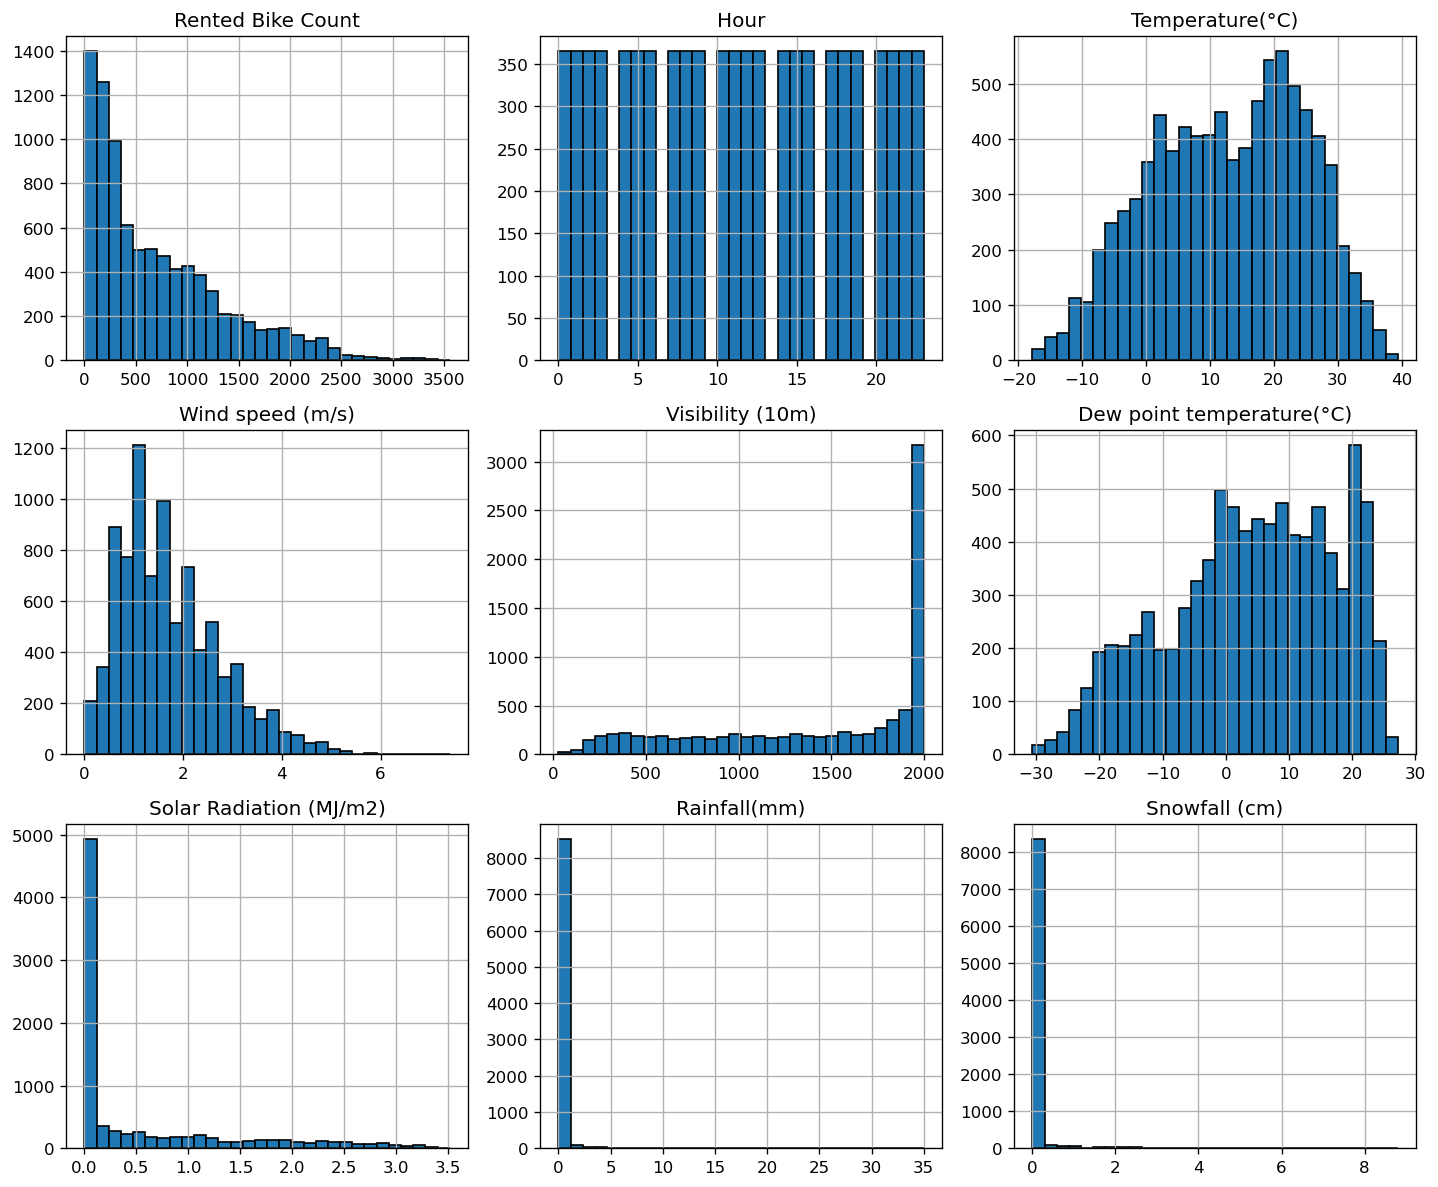

In [11]:
import matplotlib.pyplot as plt

# Select continuous columns by their index or names
continuous_columns = [
    'Rented Bike Count',
    'Hour',
    'Temperature(°C)',
    'Wind speed (m/s)',
    'Visibility (10m)',
    'Dew point temperature(°C)',
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)'
]

# Create histograms for these columns
continuous_fig = data[continuous_columns].hist(
    figsize=(12, 10),      # Set size of the overall figure
    bins=30,               # Number of bins per histogram
    edgecolor='black'      # Optional: makes bars clearer
)

# Tidy up layout
plt.tight_layout()



**Q6. Convert continuous variables into categorical variables.**


Note that in the histograms above, these continuous variables have very distinct distribution profiles. For instance, some variables have a very high frequency for a specific value (e.g. zero Solar Radiation). 

It might be useful to have such distinctive values as additional categorical variables.

Create a new DataFrame with four additional columns with the binary variables for values that occur particularly often in the variables `Solar Radiation`, `Snowfall`, `Rainfall` and `Visibility`. 
Create the new columns called `Zero Solar Radiation`, `Zero Snowfall`, `Zero Rainfall` and `Max Visibility`, in this order. 

For instance, the binary variable `Zero Solar Radiation` will indicate if `Solar Radiation` is _close to_ zero (in this question, if it is smaller than 0.1). The same is true for columns `Zero Snowfall` and `Zero Rainfall`.

Since the most common `Visibility` value is not zero, the binary variable `Max Visibility` will indicate if `Visibility` is _close to_ its maximum value (i.e. if its value is greater than its max value - 0.1).

First, however, create a copy of `data_humidity` using the `.copy()` method. Call your new DataFrame `data_binary`.

In [12]:
# Add your code below
# Create a copy of the previous dataframe
data_binary = data_humidity.copy()

# Create binary columns based on thresholds
data_binary['Zero Solar Radiation'] = data_binary['Solar Radiation (MJ/m2)'] < 0.1
data_binary['Zero Snowfall'] = data_binary['Snowfall (cm)'] < 0.1
data_binary['Zero Rainfall'] = data_binary['Rainfall(mm)'] < 0.1

# Calculate the maximum value of Visibility
max_visibility = data_binary['Visibility (10m)'].max()

# Create binary column for maximum visibility
data_binary['Max Visibility'] = data_binary['Visibility (10m)'] > (max_visibility - 0.1)



Once you have created these new columns, uncomment and run the following cell:

In [13]:
data_binary["Zero Solar Radiation"].value_counts()
# data_binary["Zero Snowfall"].value_counts()
# data_binary["Zero Rainfall"].value_counts()

Zero Solar Radiation
True     4843
False    3917
Name: count, dtype: int64

**Q7. Normalise variables.**


It is important to ensure that input data are all scaled to the same range. Without this, the model may produce inaccurate predictions. Normalising each input variable can help train the model, allow easier interpretation of the learned parameters, and offer better regularisation.

Normalise each of the continuous variables in `data` to a *z-scored* DataFrame (such that each column has zero mean and unit variance). Use the transformation:

$$z = \frac{x - \mu}{\sigma}$$

Where `x` is the original column values, `μ` is the mean of the column, and `σ` is the standard deviation of the column.

Save the results in a different DataFrame, `data_z`, and visualise the new distributions using the `.hist()` and `plt.tight_layout()` methods.

Assign the plot to a variable called `normalise_fig`.

*Hint: use the `mean()` and `std()` methods for the chosen columns.*

<Figure size 768x576 with 0 Axes>

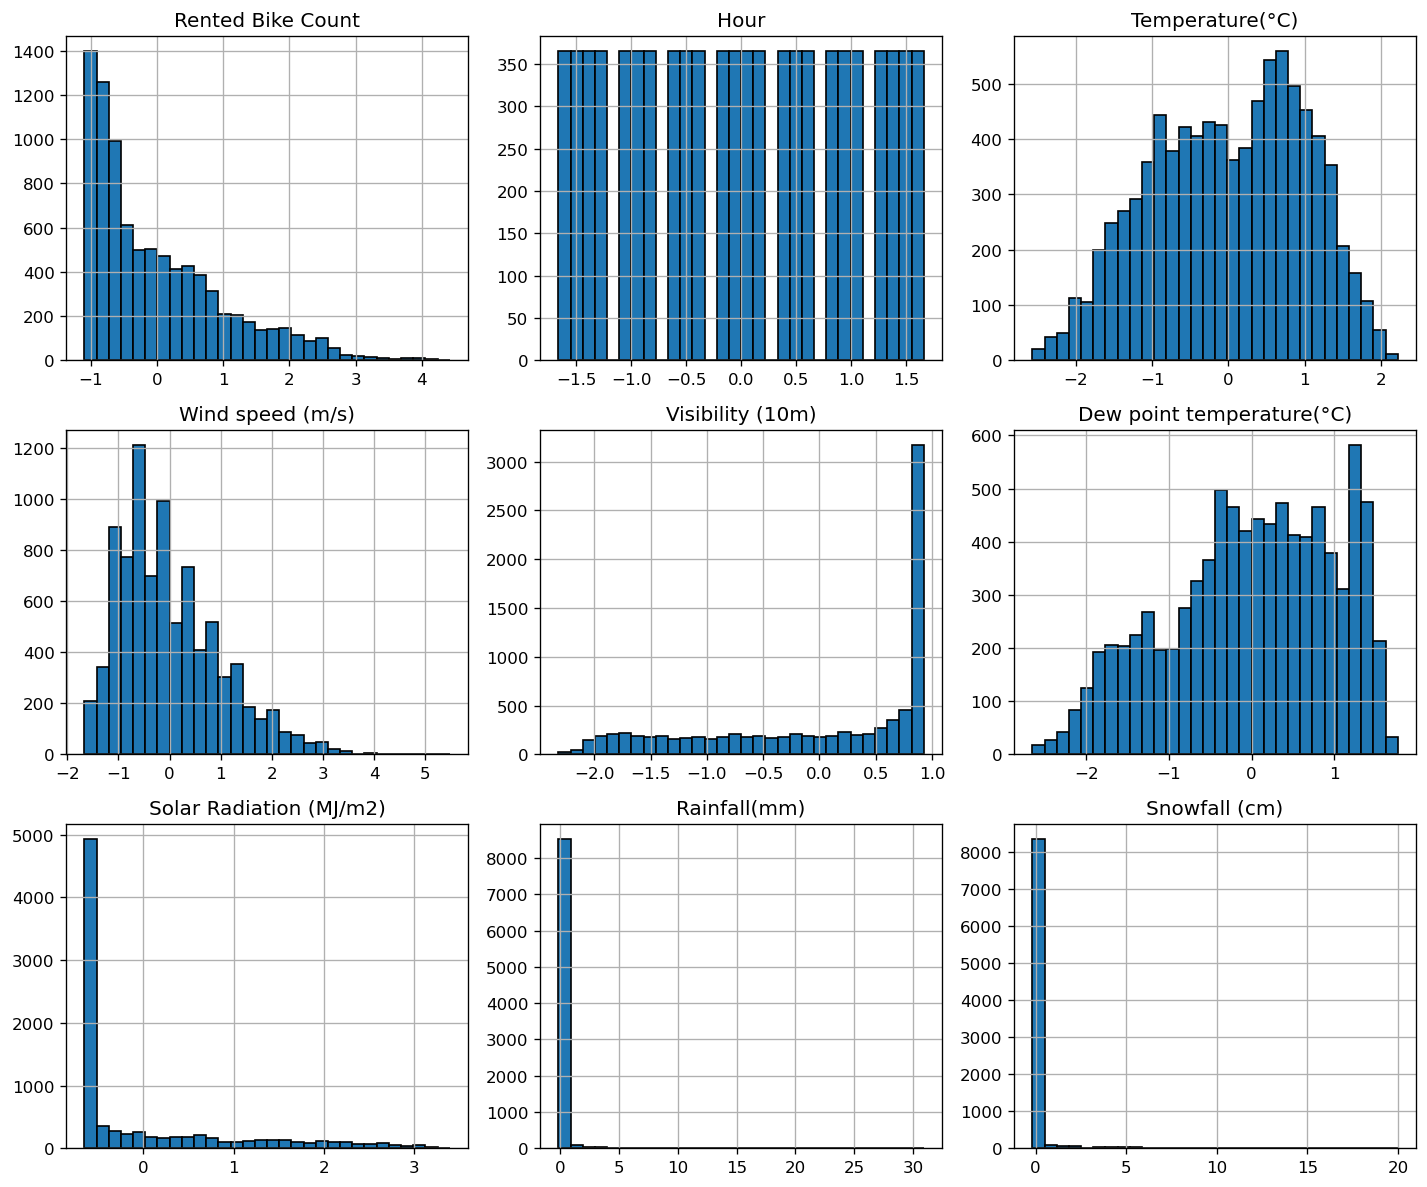

In [14]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
# Create a copy to store z-scored data
data_z = data[continuous_columns].copy()

# Apply z-score normalization
for col in continuous_columns:
    mean = data[col].mean()
    std = data[col].std()
    data_z[col] = (data[col] - mean) / std
    
# Plot histograms of normalized continuous variables
normalise_fig = data_z[continuous_columns].hist(
    figsize=(12, 10),
    bins=30,
    edgecolor='black'
)

# Adjust layout
plt.tight_layout()


## Advanced discretisation

**Q8. Discretising a circular variable.**


Some continuous variables are not actually linear variables, and are not a natural input to a linear model. For example, `Hour` is a circular variable - the values 23 and 1 are actually close together in the day. 

Let us transform `Hour` into discrete categories.  Divide the variable into 5 categories: `Morning` (6-10), `Afternoon` (11-16), `Evening` (17-19), `Night` (20-23), `Early Morning` (0-5).

For example:

...|Hour|...|Morning|Afternoon|Evening|Night|Early Morning
---|---|---|---|---|---|---|---
...|1|...|False|False|False|False|True
...|13|...|False|True|False|False|False


First, however, create a copy of `data_binary` using the `.copy()` method. Call your new DataFrame `data_time_categories`.

In [15]:
# Add your code below
# Create a copy of data_binary
data_time_categories = data_binary.copy()

# Create boolean columns for each time-of-day category
data_time_categories['Morning'] = data_time_categories['Hour'].between(6, 10)
data_time_categories['Afternoon'] = data_time_categories['Hour'].between(11, 16)
data_time_categories['Evening'] = data_time_categories['Hour'].between(17, 19)
data_time_categories['Night'] = data_time_categories['Hour'].between(20, 23)
data_time_categories['Early Morning'] = data_time_categories['Hour'].between(0, 5)



Once you have implemented the above question, uncomment and run the following cell:

In [16]:
data_time_categories["Morning"].value_counts()

Morning
False    6935
True     1825
Name: count, dtype: int64

**Q9. Inspecting target variable dependency.**


The categories chosen above for `Hour` were rather arbitrary. One more advanced data preprocessing step is to inspect how a given input variable influences the target variable. 

Let's use the `seaborn` library to plot this dependency in detail - how the target variable `Rented Bike Count` depends on `Hour` - with the `sns.violinplot()` method. It shows the distribution of bike rentals for each hour of the day. Assign the output of the plot to a variable called `bike_hour_dependency`. For input data, use the `data` DataFrame.

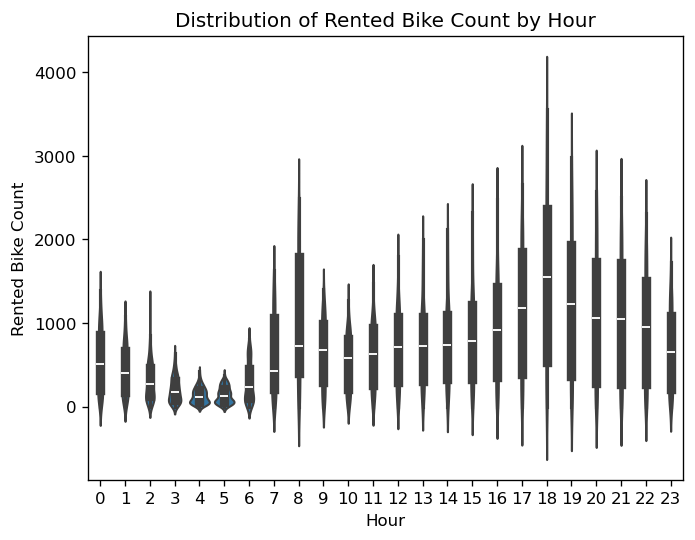

In [17]:
# We create a new figure to make other figures in the notebook don't get modified
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot showing distribution of bike rentals per hour
bike_hour_dependency = sns.violinplot(x='Hour', y='Rented Bike Count', data=data)

# Ensure the x-axis label is explicitly set to 'Hour'
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count by Hour')

plt.show()

We can see that there is complex relation between the variables. Note that as linear models are only sensitive to the mean correlation between variables (not the full distribution), we can focus on the mean values.

**Q10. Calculate the mean `Rented Bike Count` for each hour of the day.**


Use the methods `.groupby()` and `.mean()` on the `data` DataFrame, save the result to a variable called `mean_count`, and plot the result using `.plot()`.

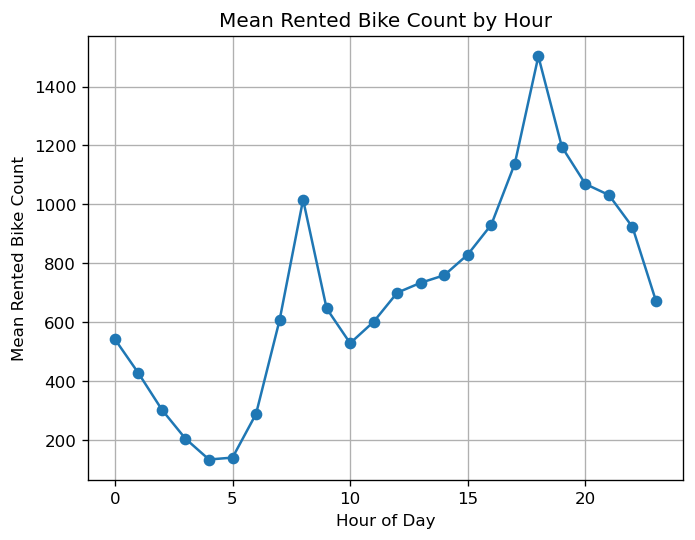

In [18]:
# Add your code below
import matplotlib.pyplot as plt

# Group by 'Hour' and calculate mean of 'Rented Bike Count'
mean_count = data.groupby('Hour')['Rented Bike Count'].mean()

# Plot the mean rented bike count by hour
mean_count.plot(kind='line', marker='o')

# Add labels and title for clarity
plt.xlabel('Hour of Day')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count by Hour')

plt.grid(True)
plt.show()



**Q11. Discretise nonlinear dependency.**


We see in the plot above, a highly nonlinear effect of the variable `Hour` on the mean of the target variable `Rented Bike Count`. A linear model is not sensitive to this and it is a strong indication that discretisation of the variable will help. As above, let's create categorical variables for different ranges of `Hour`, but now taking into account the dependency of the target variable.

We expect that a category will be more predictive if the target does not vary too much for samples of that category. For instance, the target value is similar for the hours 10, 11, 12 and 13, indicating that the range `10 <= Hour < 14` might have good predictive power for the target.

Divide `Hour` into five new columns as follows:

New column name | Data
---|---
Hour Cat 1 | `3 <= Hour < 7`
Hour Cat 2 | `7 <= Hour < 10`
Hour Cat 3 | `10 <= Hour < 14`
Hour Cat 4 | `14 <= Hour < 22`
Hour Cat 5 | `22 <= Hour` or `Hour < 3`
 
Which will look like:

...|Hour|...|Hour Cat 1|Hour Cat 2|Hour Cat 3|Hour Cat 4|Hour Cat 5
---|---|---|---|---|---|---|---
...|2|...|False|False|False|False|True
...|9|...|False|True|False|False|False

First, create a copy of `data_time_categories` using the `.copy()` method. Call your new DataFrame `final_data`.

In [19]:
# Add your code below
# Create a copy of data_time_categories
final_data = data_time_categories.copy()

# Define the new hour categories
final_data['Hour Cat 1'] = final_data['Hour'].between(3, 6)  # 3 <= Hour < 7
final_data['Hour Cat 2'] = final_data['Hour'].between(7, 9)  # 7 <= Hour < 10
final_data['Hour Cat 3'] = final_data['Hour'].between(10, 13)  # 10 <= Hour < 14
final_data['Hour Cat 4'] = final_data['Hour'].between(14, 21)  # 14 <= Hour < 22

# For Hour Cat 5: 22 <= Hour or Hour < 3
final_data['Hour Cat 5'] = (final_data['Hour'] >= 22) | (final_data['Hour'] < 3)



Notice that in this case an hour-by-hour division may even be reasonable. But on the other hand, too many input variables can lead to overfitting problems.

## Evaluating predictions

**Q12. Implement linear regression model.**


Create a function with a single argument `cols`, which takes as input a `list` of column names to be used to train the model.

You will need to assign these columns of the `final_data` DataFrame to a variable (`X`), assign the `Rented Bike Count` column to another variable (`Y`), and then use the `.fit()` method of the `LinearRegression` class to train your model.

Note that you will have to reshape your `Y` variable using the `.reshape()` method. It is currently an array (`[254, 204, ...]`) but the `LinearRegression` model expects it as an _array of arrays_ (`[[254], [204], ...]`).

Finally, use the `mean_squared_error` to compute the error. Once computed, return the error as a `float`.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def prediction_error(cols):
    # Assign feature columns to X (DataFrame)
    X = final_data[cols]
    
    # Assign target variable column to Y (Series)
    Y = final_data['Rented Bike Count']
    
    # Convert Y to 2D numpy array as expected by sklearn
    Y_reshaped = Y.values.reshape(-1, 1)
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, Y_reshaped)
    
    # Predict target values
    Y_pred = model.predict(X)
    
    # Calculate MSE and return as float
    mse = mean_squared_error(Y_reshaped, Y_pred)
    return float(mse)


Uncomment and run the code below to check your implementation.

In [21]:
prediction_error(["Temperature(°C)"])

295323.04138856236

**Q13. Compare performance of different `Hour` representations.**


Compare the predictions of our linear model on the original `Hour` variable versus our hand-crafted categorical representations (`Hour Cat 1`, `Hour Cat 2` etc).

Assign the output of the `prediction_error()` function to two variables:
  1. `model1`: for just the `Hour` variable.
  2. `model2`: for the categorical representations that we created.

Which model has the better performance? Note that with `mean_squared_error`, a lower error indicates a better fit to the data.

In [22]:
# Add your code below
# Model 1: Using just the original Hour variable
model1 = prediction_error(['Hour'])

# Model 2: Using the categorical Hour variables
categorical_hour_cols = ['Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']
model2 = prediction_error(categorical_hour_cols)

print(f"Model 1 (Original Hour) MSE: {model1}")
print(f"Model 2 (Categorical Hour) MSE: {model2}")

if model2 < model1:
    print("Categorical hour representation performs better (lower MSE).")
else:
    print("Original Hour representation performs better (lower MSE).")



Model 1 (Original Hour) MSE: 345961.18287118233
Model 2 (Categorical Hour) MSE: 325919.49224197527
Categorical hour representation performs better (lower MSE).


**Q14. Compare the prediction error based on the original variables to the prediction error for variables after preprocessing.**

1. Save to the variable `full_model_original`, the result of calling `prediction_error()` on the original columns which are suitable for a linear regression model. In this case these are `['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']`.
<br><br>
2. Save to the variable `full_model_updated`, the result of calling `prediction_error()` using our processed variables. For `full_model_updated`, include the variables from `full_model_original` that we didn't preprocess (like `Temperature(°C)`, `Wind speed (m/s)` etc), but where we have processed a variable (like `Hour`), don't include the unprocessed variable.

In [23]:
# Add your code below
# Original columns suitable for linear regression
original_cols = [
    'Hour', 
    'Temperature(°C)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)'
]

# Columns after preprocessing:
# - For Hour, use the processed categorical columns (Hour Cat 1 to Hour Cat 5)
# - For other variables, keep as is (assuming they weren't preprocessed)
processed_cols = [
    'Temperature(°C)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)',
    'Hour Cat 1', 
    'Hour Cat 2', 
    'Hour Cat 3', 
    'Hour Cat 4', 
    'Hour Cat 5'
]

# Calculate prediction errors
full_model_original = prediction_error(original_cols)
full_model_updated = prediction_error(processed_cols)

print(f"Full Model Original MSE: {full_model_original}")
print(f"Full Model Updated MSE: {full_model_updated}")



Full Model Original MSE: 221809.59060298427
Full Model Updated MSE: 209186.65507043785


In [24]:
# Verify the Hour Cat columns in final_data
print(final_data[['Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']].head())

# Verify the processed_cols list
print("Processed Columns:", processed_cols)

   Hour Cat 1  Hour Cat 2  Hour Cat 3  Hour Cat 4  Hour Cat 5
0       False       False       False       False        True
1       False       False       False       False        True
2       False       False       False       False        True
3        True       False       False       False       False
4        True       False       False       False       False
Processed Columns: ['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']


In [25]:
# Debugging: Verify Hour Cat columns and processed_cols
print("Hour Cat Columns in final_data:")
print(final_data[['Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']].head())

print("Processed Columns:")
print(processed_cols)

# Debugging: Verify prediction_error function output
print("Prediction Error for Processed Columns:")
print(prediction_error(processed_cols))

Hour Cat Columns in final_data:
   Hour Cat 1  Hour Cat 2  Hour Cat 3  Hour Cat 4  Hour Cat 5
0       False       False       False       False        True
1       False       False       False       False        True
2       False       False       False       False        True
3        True       False       False       False       False
4        True       False       False       False       False
Processed Columns:
['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']
Prediction Error for Processed Columns:
209186.65507043785


In [ ]:
# Additional Debugging: Inspect final_data and Hour Cat columns
print("Final DataFrame Columns:")
print(final_data.columns)

print("Sample Rows from final_data:")
print(final_data.head())

print("Hour Cat Columns Distribution:")
for col in ['Hour Cat 1', 'Hour Cat 2', 'Hour Cat 3', 'Hour Cat 4', 'Hour Cat 5']:
    print(f"{col}:")
    print(final_data[col].value_counts())